In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle

In [3]:
df = pd.read_csv('data/german_onehotencoded.csv')
ds = df.to_numpy()
y = ds[:,-2: -1] # for last column
x = ds[:, :-2] # for all but last column
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
df.head()


print('class 0 (orig): ',len(y[y == 0]))
print('class 1 (orig): ', len(y[y == 1]))

class 0 (orig):  700
class 1 (orig):  300


In [58]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(x, y)

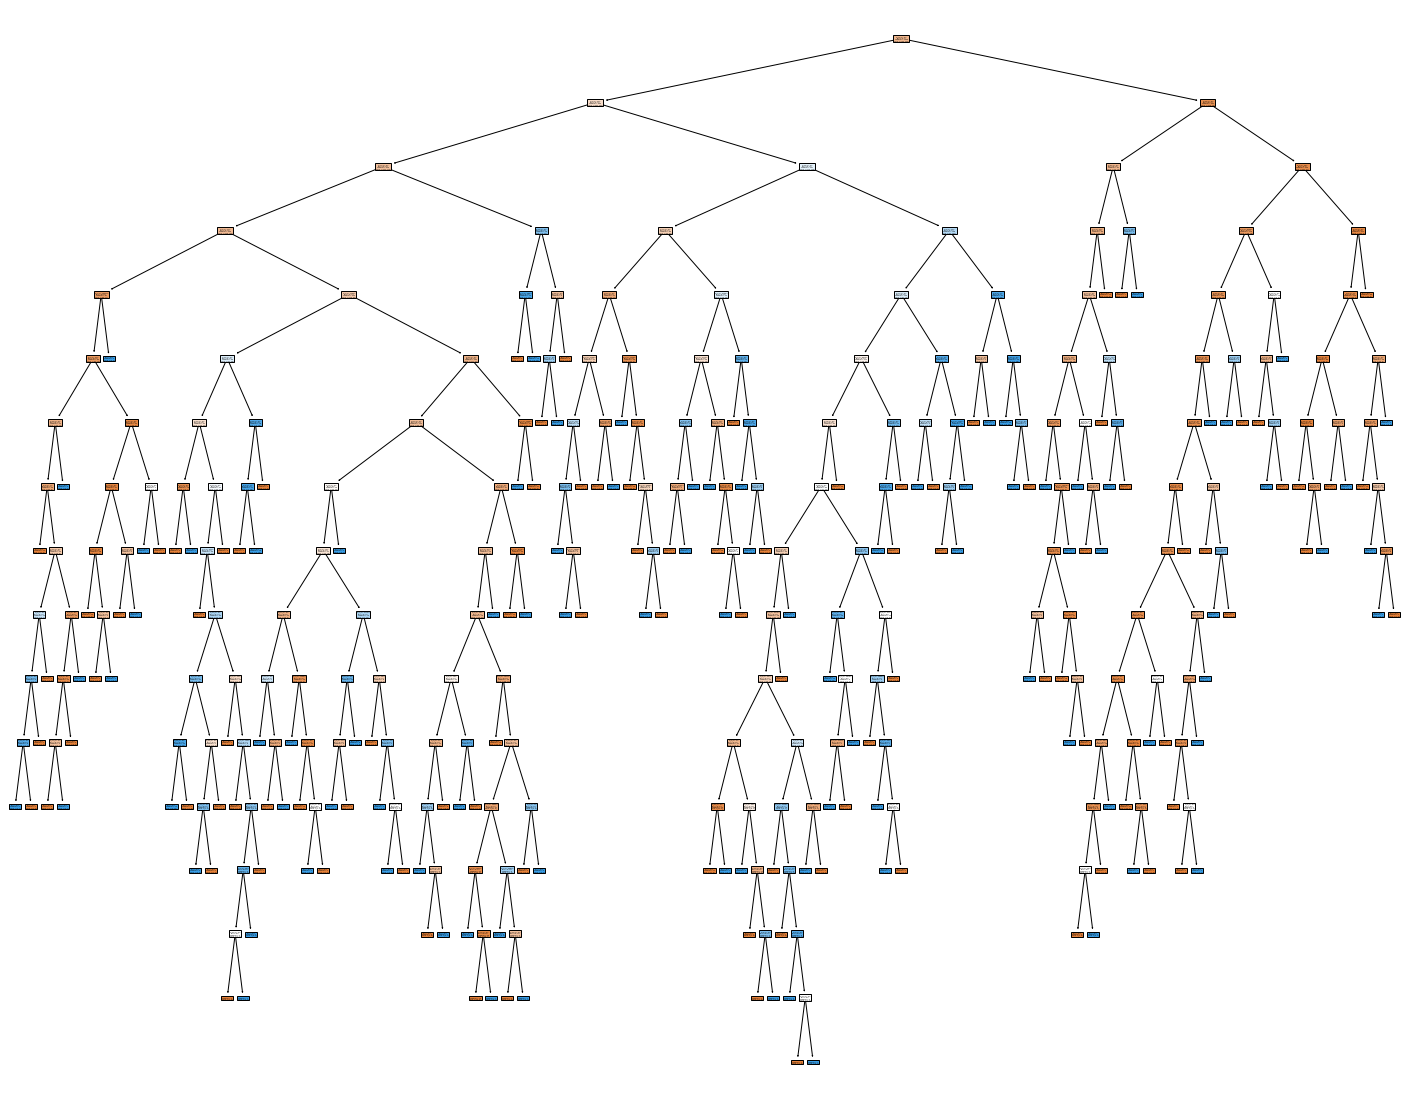

In [59]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   filled=True)

In [60]:
from sklearn.tree import plot_tree

In [61]:
def plot_decision_tree(model, feature_names, class_names):
    # plot_tree function contains a list of all nodes and leaves of the Decision tree
    tree = plot_tree(model, feature_names = feature_names, class_names = class_names,
                     rounded = True, proportion = True, precision = 2, filled = True, fontsize=10)

    # I return the tree for the next part
    return tree



def plot_decision_path_tree(model, X, class_names=None, size=(15, 12)):
    fig = plt.figure(figsize=size)
    class_names = model.classes_.astype(str) if type(class_names) == type(None) else class_names
    feature_names = X.index if type(X) == type(pd.Series()) else X.columns

    # Getting the tree from the function programmed above
    tree = plot_decision_tree(model, feature_names, class_names)

    # Get the decision path of the wanted prediction
    decision_path = model.decision_path([X])

    # Now remember the tree object contains all nodes and leaves so the logic here
    # is to loop into the tree and change visible attribute for components that
    # are not in the decision path
    for i in range(0,len(tree)):
        if i not in decision_path.indices:
            plt.setp(tree[i],visible=False)
    #plt.show()

In [62]:
print(df.columns[:-2])

Index(['Duration in month', 'Credit amount',
       'Installment rate in percentage of disposable income',
       'Present residence since', 'Age in years',
       'Number of existing credits at this bank',
       'Number of people being liable to provide maintenance for',
       'Status of existing checking account_0 <= <200 DM',
       'Status of existing checking account_<0 DM',
       'Status of existing checking account_>= 200 DM ',
       'Status of existing checking account_no checking account',
       'Credit history_all credits at this bank paid back duly',
       'Credit history_critical account', 'Credit history_delay in paying off',
       'Credit history_existing credits paid back duly till now',
       'Credit history_no credits taken', 'Purpose_business',
       'Purpose_car (new)', 'Purpose_car (used)',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_others',
       'Purpose_radio/television', 'Purpose_repairs', 

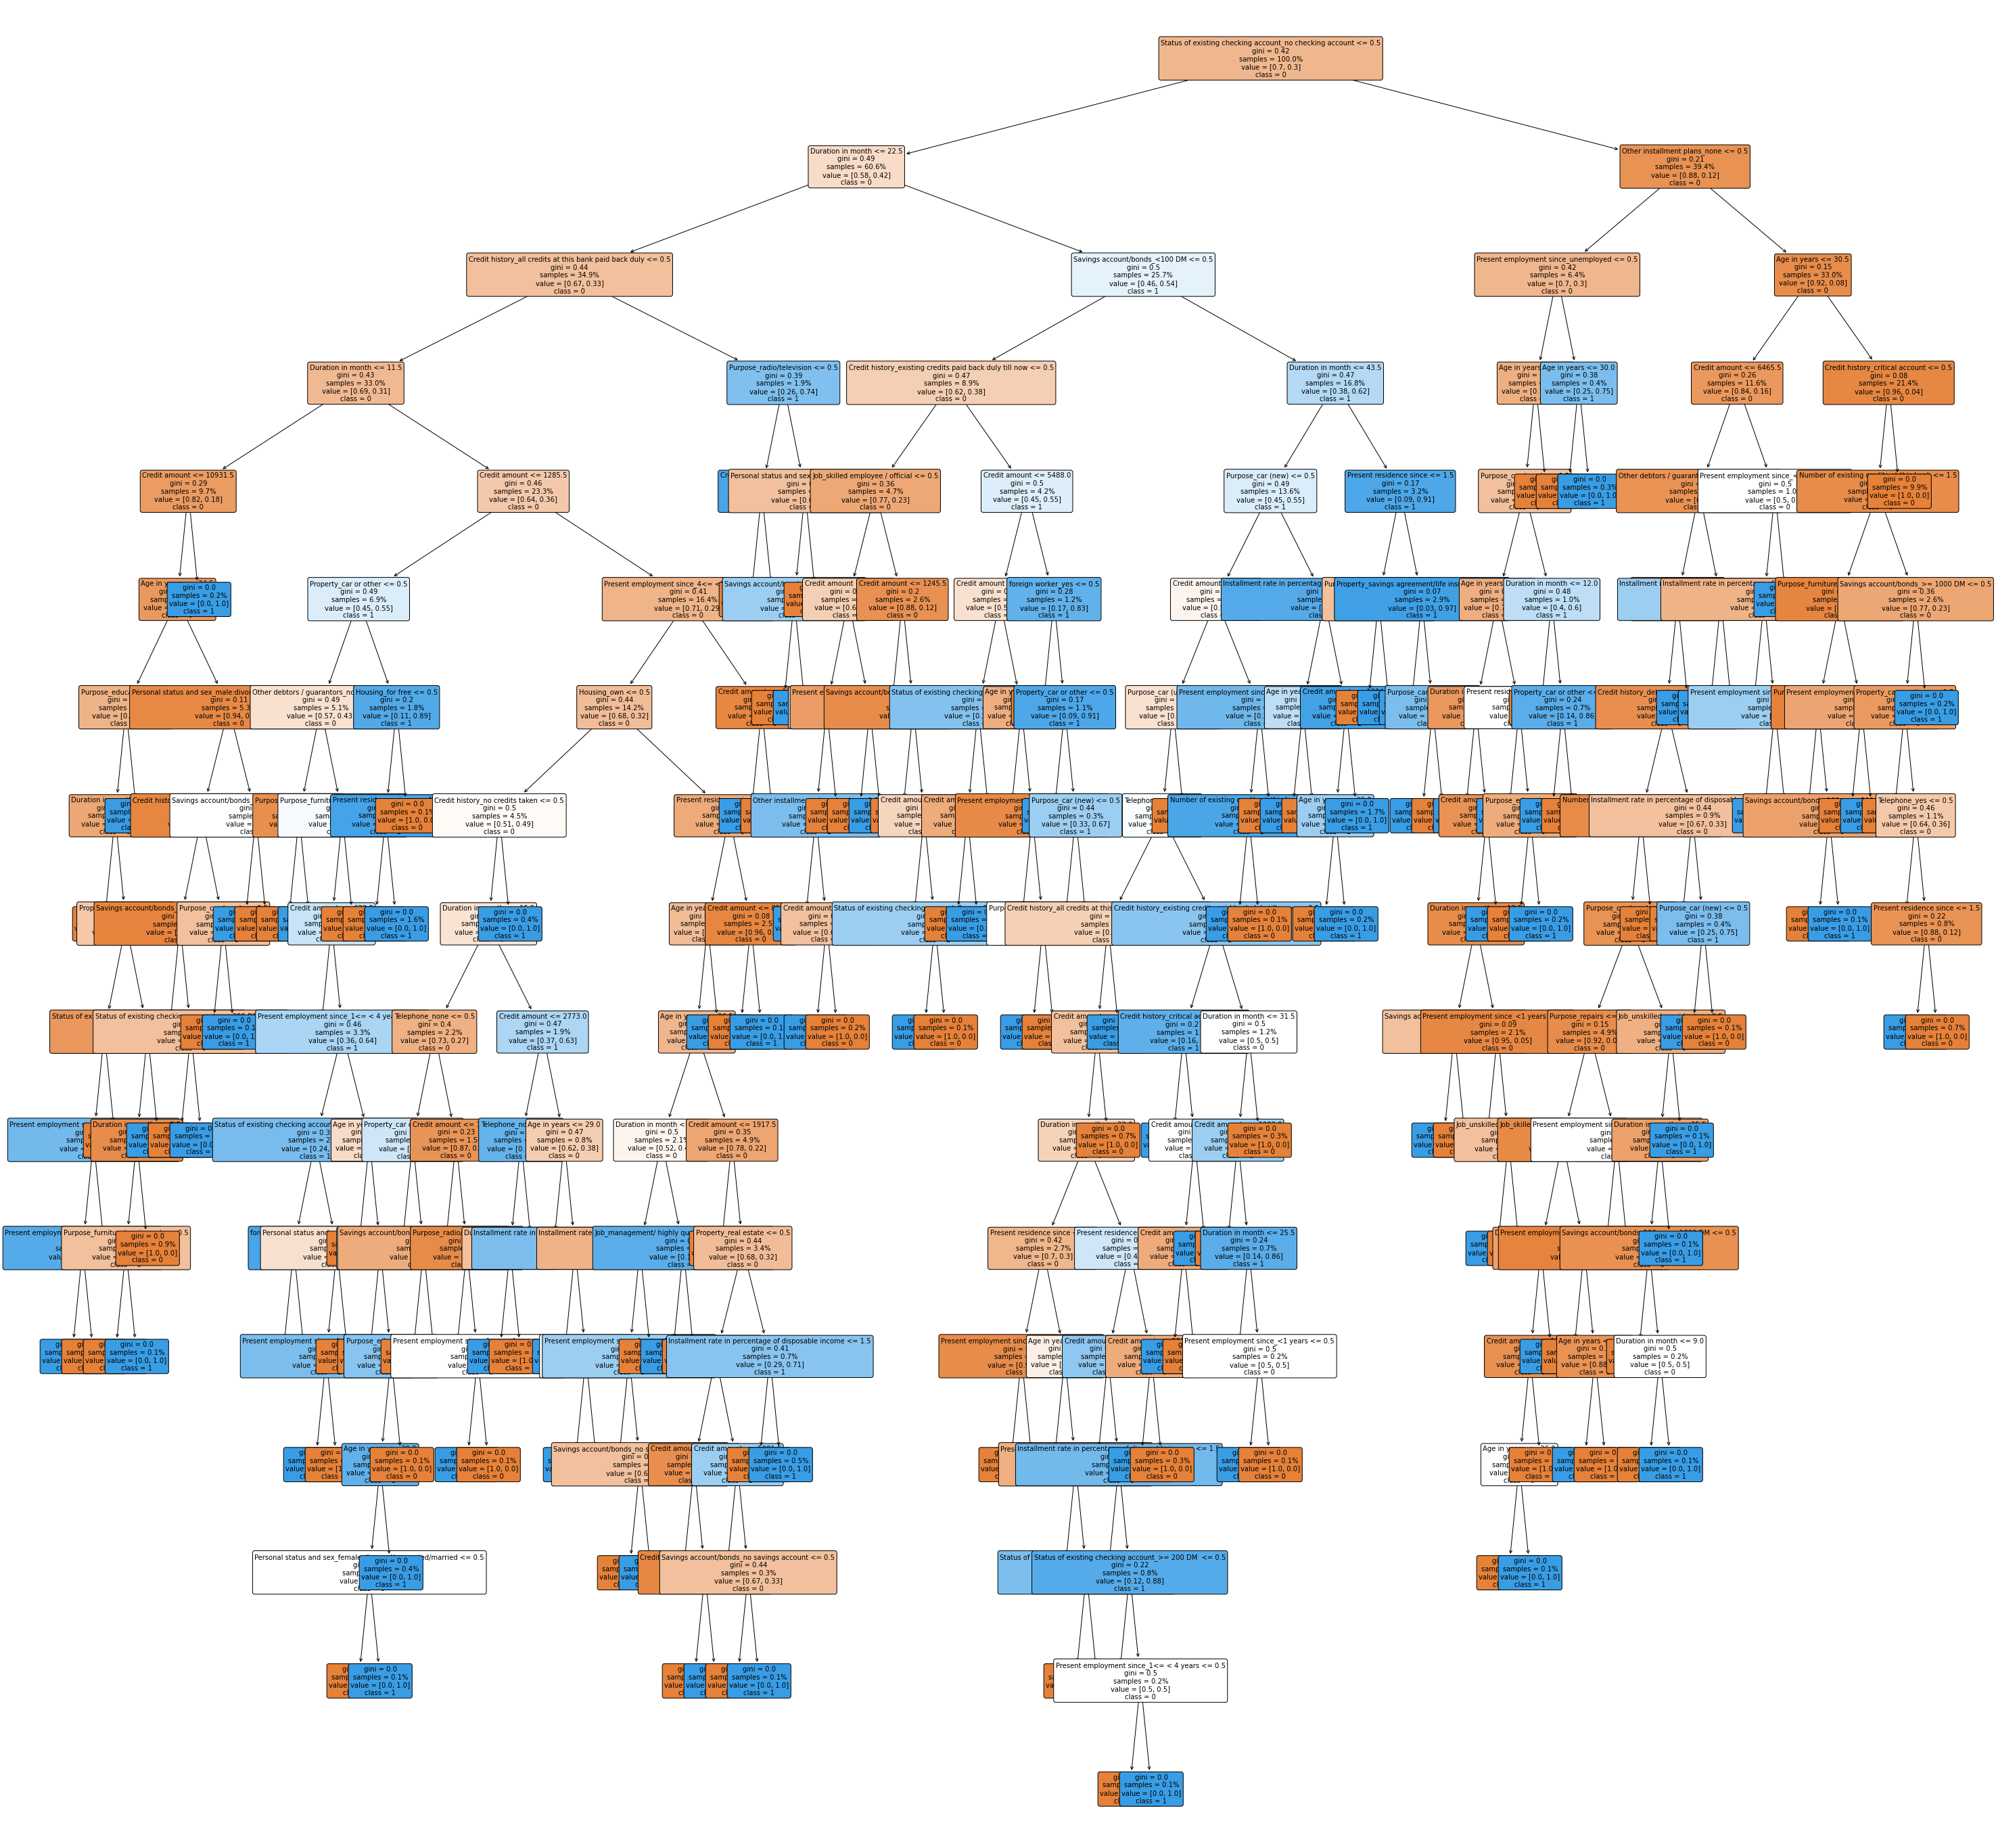

In [63]:
fig = plt.figure(figsize=(50, 50))
plot_decision_tree(model, df.columns[:-2], ['0','1'])
plt.show()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Status of existing checking account_0 <= <200 DM,Status of existing checking account_<0 DM,Status of existing checking account_>= 200 DM,...,Job_management/ highly qualified employee,Job_skilled employee / official,Job_unemployed/ unskilled - non-resident,Job_unskilled - resident,Telephone_none,Telephone_yes,foreign worker_no,foreign worker_yes,Cost Matrix(Risk)_Bad Risk,Cost Matrix(Risk)_Good Risk
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


C:\Users\icherepa\AppData\Local\Temp\ipykernel_5228\1266303890.py:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_names = X.index if type(X) == type(pd.Series()) else X.columns


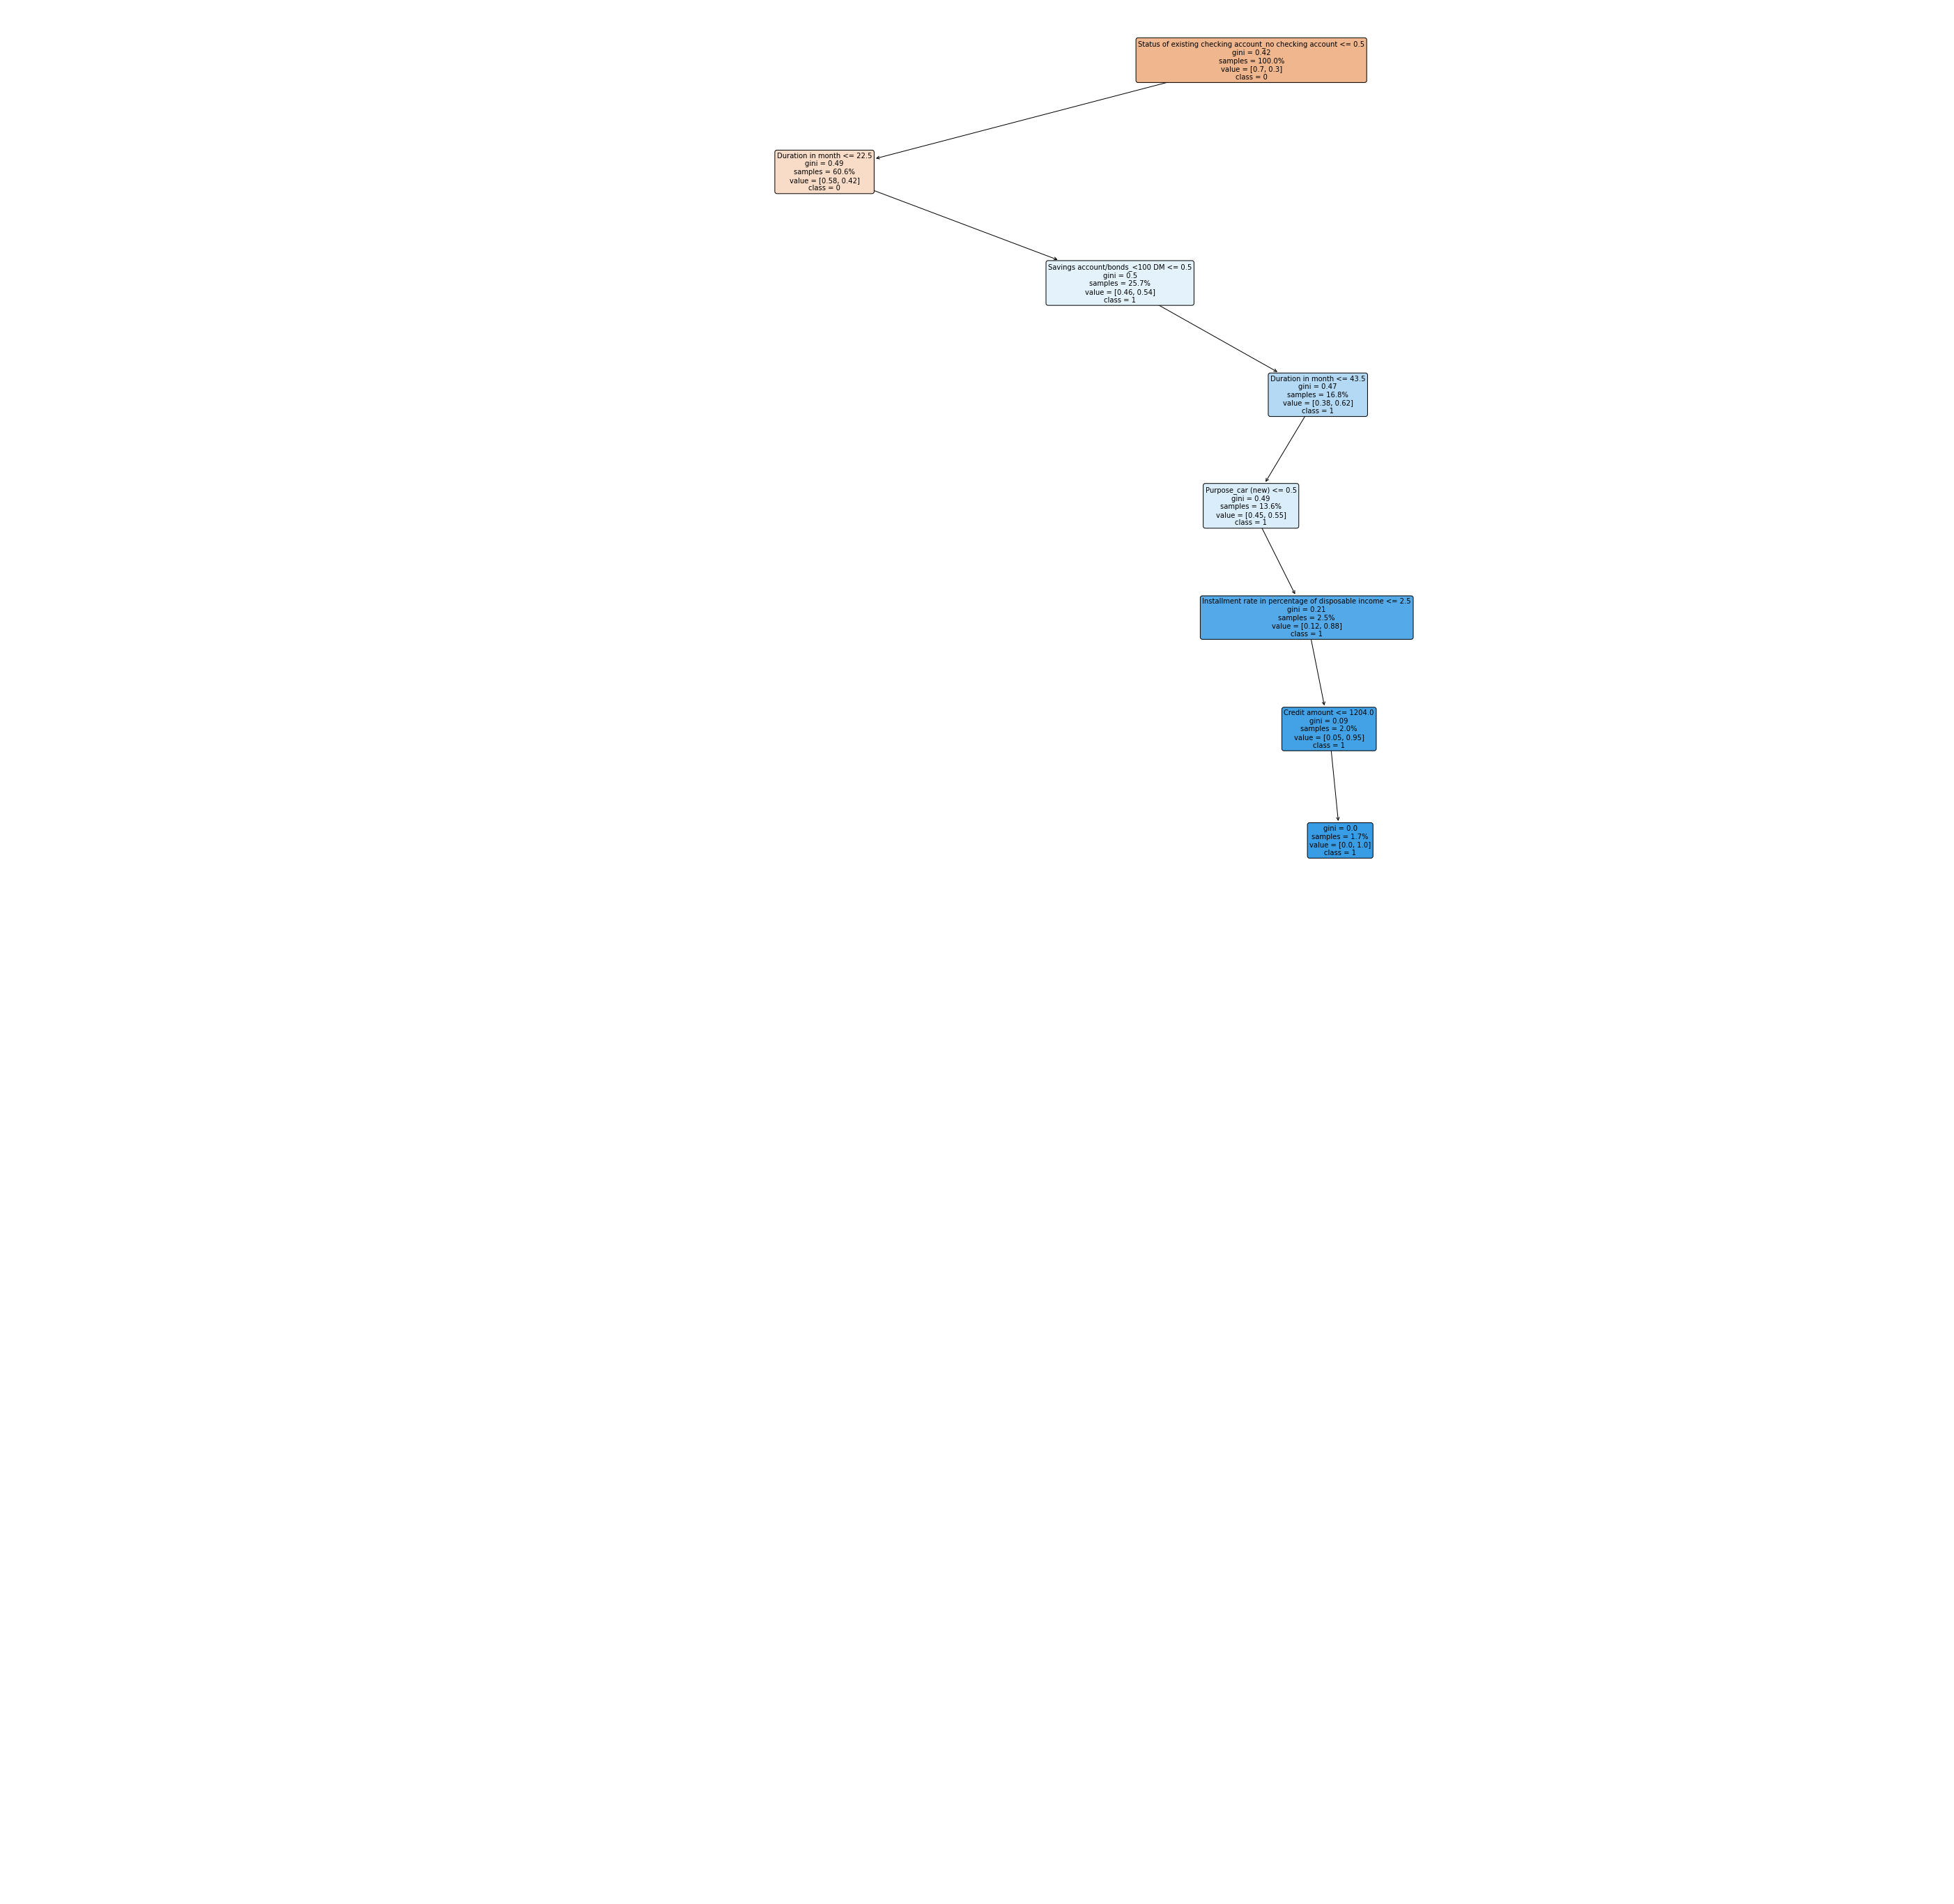

In [64]:


from IPython.display import display

display(df.iloc[0,:].to_frame().T)
plot_decision_path_tree(model, df.iloc[4,:-2], class_names=['0','1'], size=(50, 50))
plt.savefig('pic2.png')

In [66]:
filename = './models/dt_eval.model'
pickle.dump(model, open(filename, 'wb'))